[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sandy-lee29/data-viz-with-python/blob/main/Distributions_Relationships.ipynb)

# 📊 Comprehensive Guide to Data Visualization with Pandas & Seaborn & Matplotlib

##🔹 What You'll Learn <br>
✅ Seaborn fundamentals (pairplot(), relplot(), catplot(), displot()) <br>
✅ Relational Plots : Scatterplots, Regplot (to add regression line), Line charts (lineplot) <br>
✅ Distributions Plots : Histograms (histplot), Density plots (kdeplot) <br>
✅ Categorical Plots : Boxplots, Violin plots, Strip plots


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd

gapminder = pd.read_csv("gapminder.tsv", sep="\t")
print(gapminder.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


In [5]:
country_subset = gapminder[gapminder.country.isin(["France", "Germany", "Turkey"])]
country_subset.head(3)

,country,continent,year,lifeExp,pop,gdpPercap
528,France,Europe,1952,67.41,42459667,7029.809327
529,France,Europe,1957,68.93,44310863,8662.834898
530,France,Europe,1962,70.51,47124000,10560.485530


<Axes: xlabel='year', ylabel='pop'>

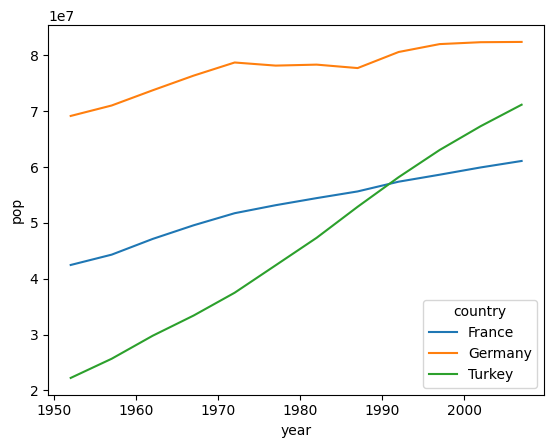

In [6]:
sns.lineplot(data=country_subset, x = "year", y = "pop", hue = "country")

## Exploratory data analysis in Seaborn
Like ggplot in R, one of Seaborn's other strengths (and a reason why people choose it over Matplotlib in general) is the ability to quickly explore a dataset with multi-panel charts, including faceted charts and pair plots. We'll briefly look at a few examples here

In [7]:
gm_2007 = gapminder[gapminder.year == 2007]
gm_2007.head()

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


In [8]:
gm_1952_2007 = gapminder[(gapminder.year == 1952) | (gapminder.year == 2007)]
gm_1952_2007.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
12,Albania,Europe,1952,55.230,1282697,1601.056136
23,Albania,Europe,2007,76.423,3600523,5937.029526
24,Algeria,Africa,1952,43.077,9279525,2449.008185


### ✅ Pairplot
 First, a pair plot, looking at the distributions and correlations of the numeric variables in the data for 2007. This includes the year, which isn't that useful - you can customize the set of variables with the vars parameter.

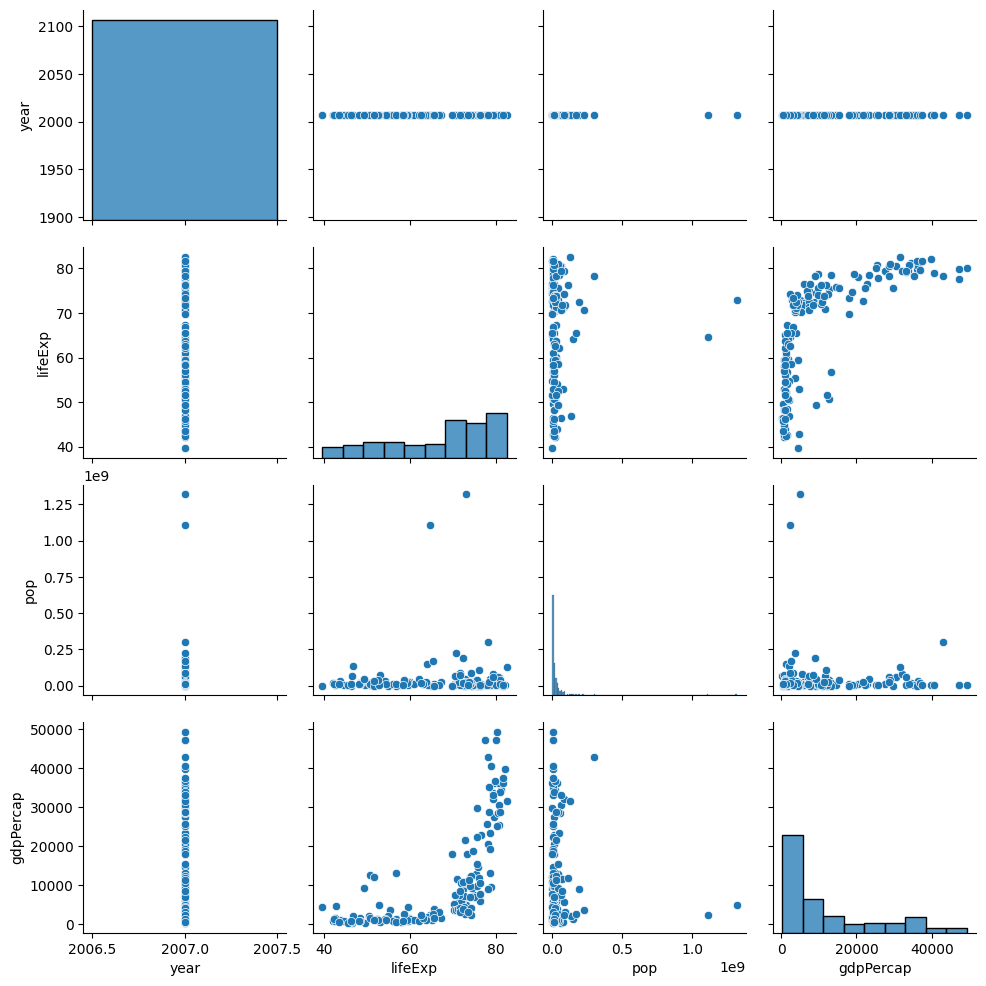

In [9]:
sns.pairplot(gm_2007)

### ✅ Pairplot
 With faceting, you can split the dataset into multiple charts according to one or two variables. For example, we can create one scatter plot for each continent. Specifying col="continent" tells Seaborn to use one column for each distinct value of continent.

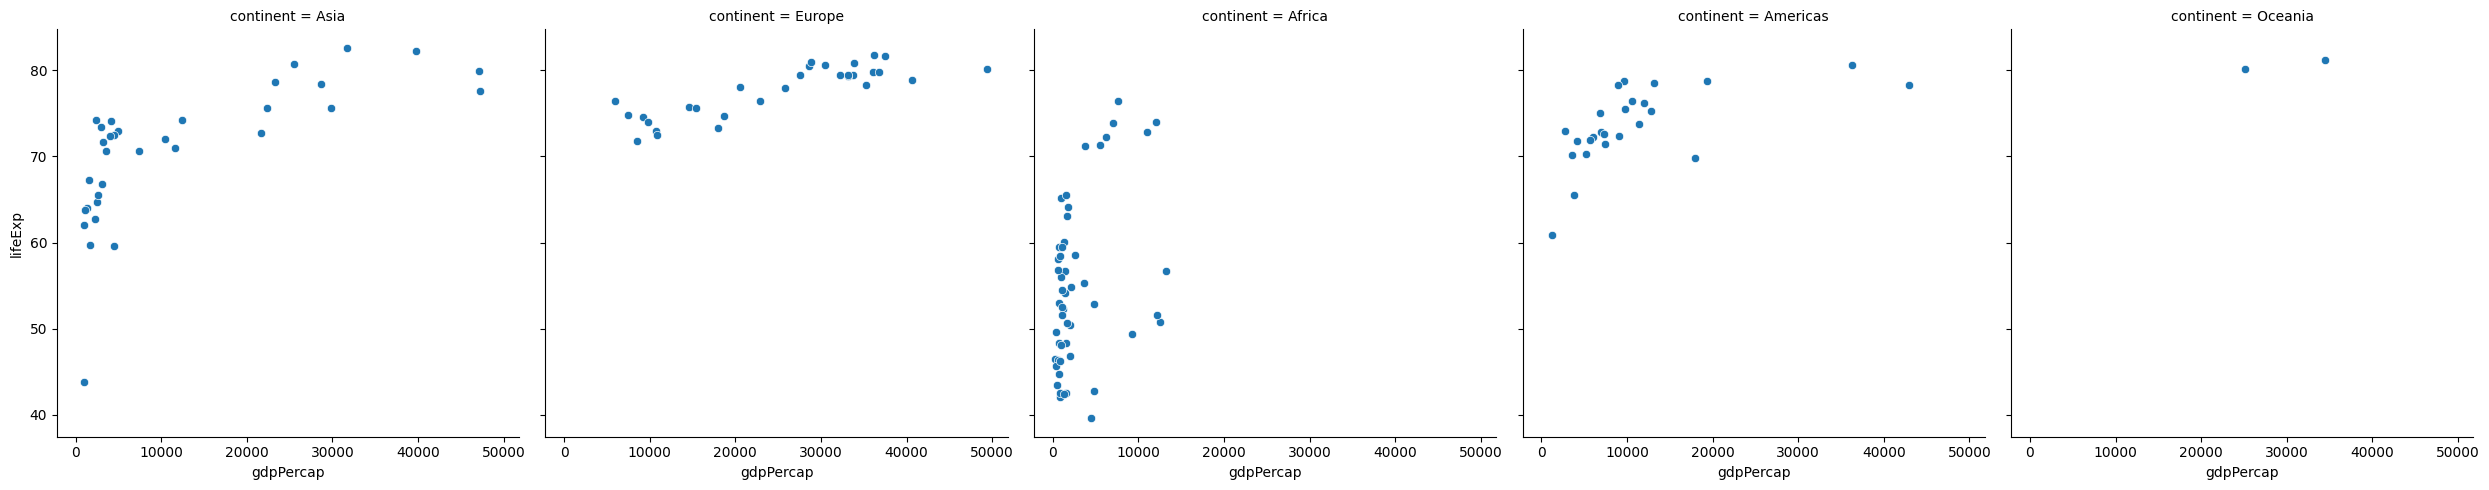

In [10]:
sns.relplot(gm_2007, x = "gdpPercap", y = "lifeExp", col = "continent", kind = "scatter")

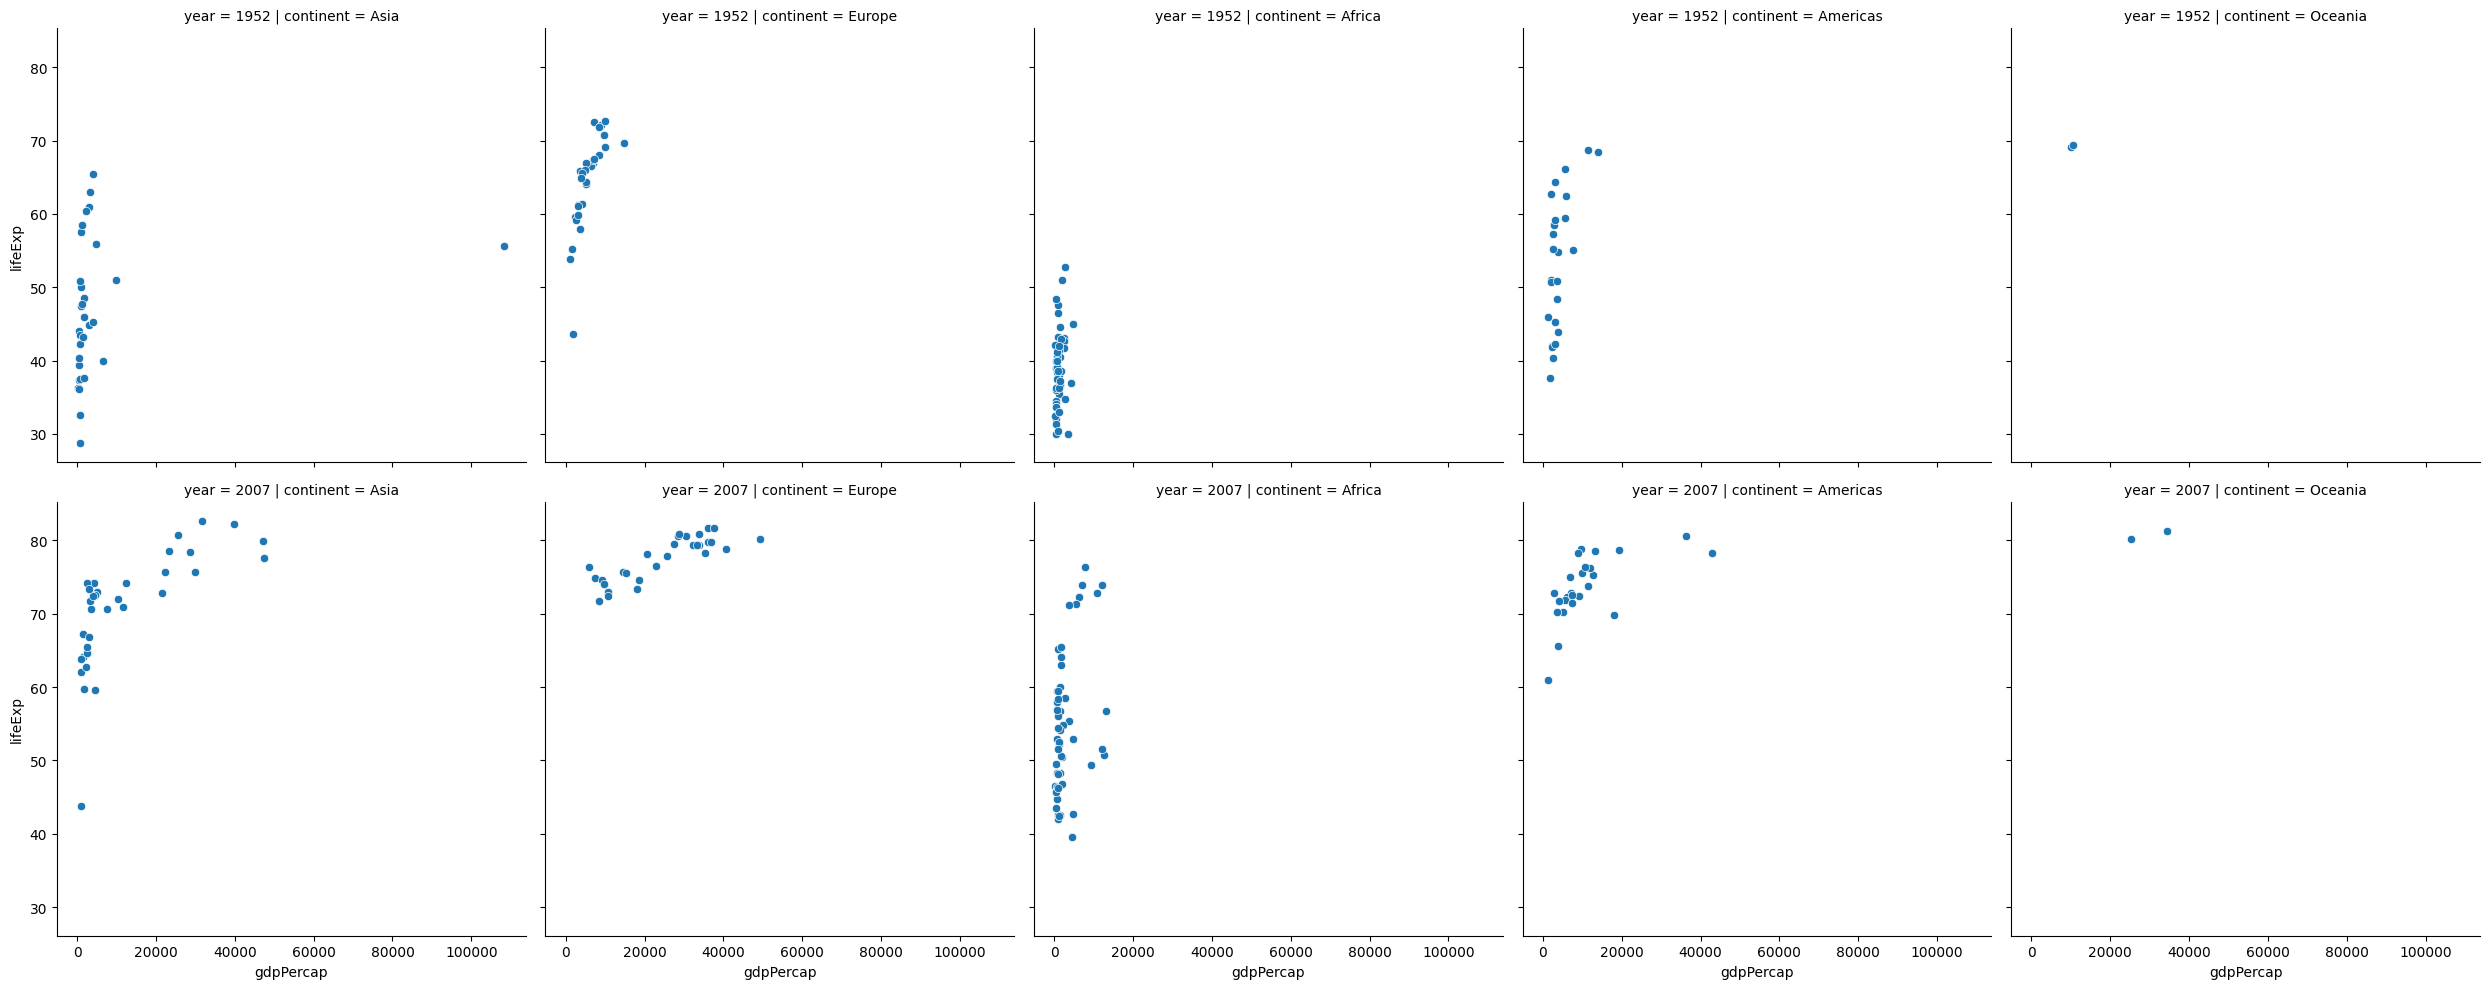

In [11]:
sns.relplot(gm_1952_2007, x="gdpPercap", y="lifeExp", row="year", col="continent", kind="scatter")

### ✅ Customizing text in Seaborn

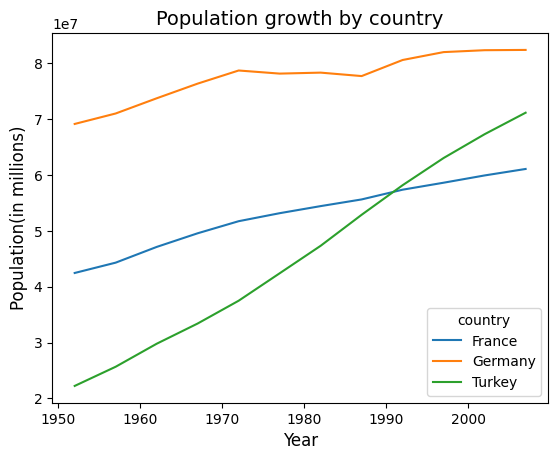

In [12]:
sns.lineplot(data=country_subset, x = "year", y = "pop", hue = "country")
plt.title("Population growth by country", fontsize = 14)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Population(in millions)", fontsize = 12)
plt.show()

### ✅ Scatter plots
- For plotting continuous variables against each other to look for a relationship between them.

<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

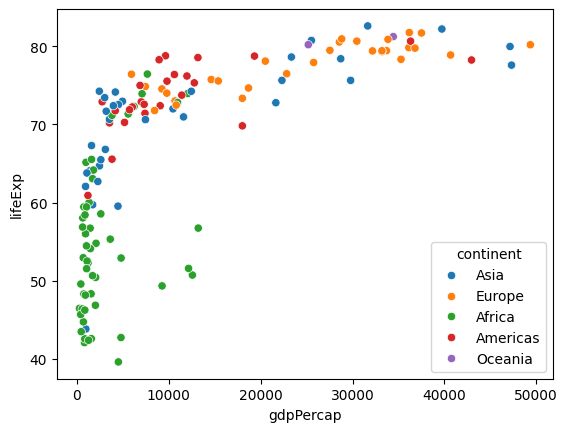

In [13]:
sns.scatterplot(gm_2007, x = "gdpPercap", y = "lifeExp", hue = 'continent')

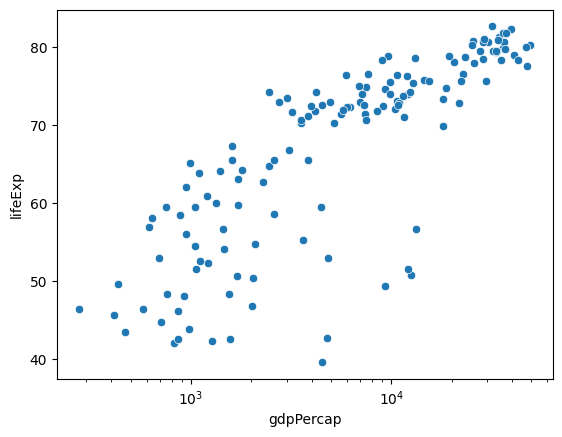

In [14]:
# You can try changing the x-axis to have a log scale
sns.scatterplot(gm_2007, x = "gdpPercap", y = "lifeExp")
plt.xscale('log')

To add a regression line, you will need to use regplot instead of scatterplot.

<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

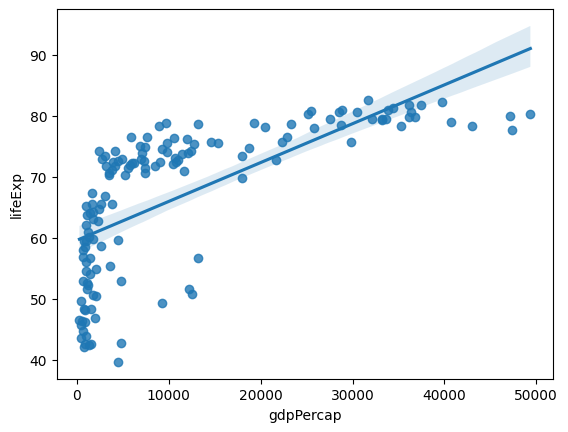

In [15]:
sns.regplot(gm_2007, x = "gdpPercap", y = "lifeExp")

<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

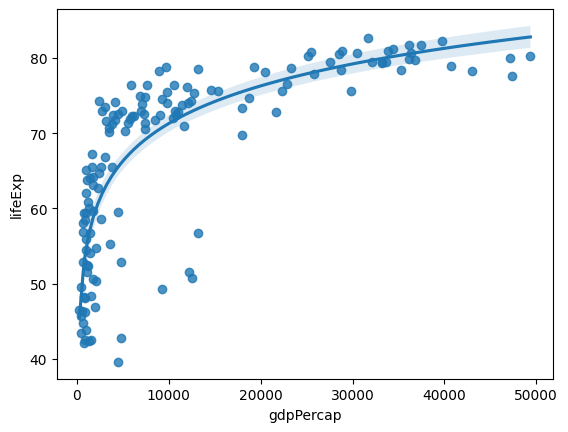

In [16]:
sns.regplot(data=gm_2007, x="gdpPercap", y="lifeExp", logx=True)

### ✅ Line charts
- When the x-axis variable has a natural order, usually time.
- Remember that this dataset contains only selected years; adding dots to the line (with the Matplotlib parameter `marker`) helps to explicitly show this (it's not clear from the line alone).

<Axes: xlabel='year', ylabel='pop'>

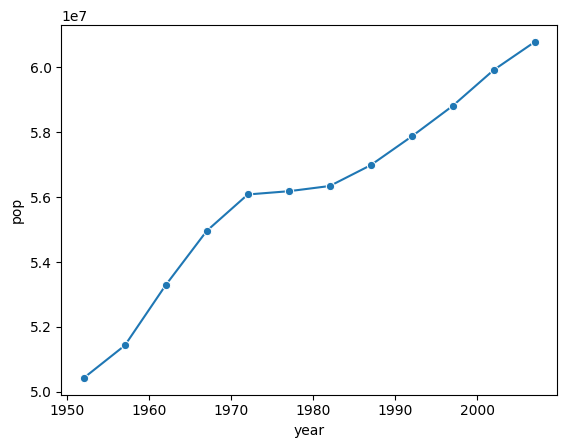

In [17]:
sns.lineplot(data=gapminder[gapminder.country == "United Kingdom"], x = "year", y = "pop", marker = "o")

<Axes: xlabel='year', ylabel='pop'>

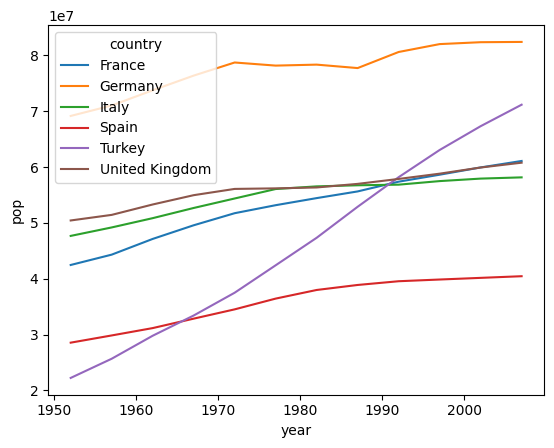

In [18]:
# We can use multiple lines to compare trends over time. For example, the population of multiple countries. We map the line color to country with hue.
sns.lineplot(data=gapminder[gapminder.country.isin(["France", "Germany", "Italy", "Spain", "Turkey", "United Kingdom"])], x="year", y="pop", hue="country")

### ✅ Histograms
- We can experiment with different numbers of bins

<Axes: xlabel='lifeExp', ylabel='Count'>

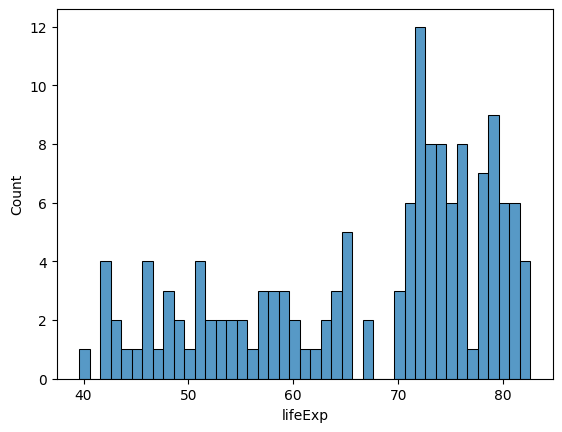

In [19]:
sns.histplot(gm_2007, x = "lifeExp", binwidth = 1)

### ✅ Density Plots
- Like a smoothed version of a histogram; the issue with choosing the bin size is replaced by choosing the amount of smoothing. The y-axis values represent the probability distribution of the values on the x-axis, adding up to 1.
- We can experiment with varying the amount of smoothing (using bw_adjust)

<Axes: xlabel='lifeExp', ylabel='Density'>

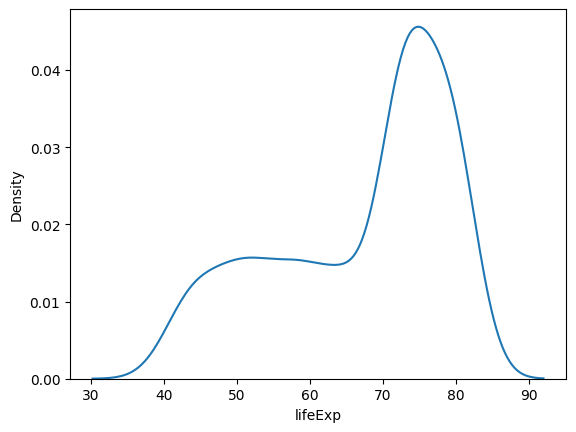

In [20]:
sns.kdeplot(gm_2007, x = "lifeExp", bw_adjust = 0.7)

### ✅ Box Plots
- Boxplots offer a compact way to compare distributions across categories.

<Axes: xlabel='continent', ylabel='lifeExp'>

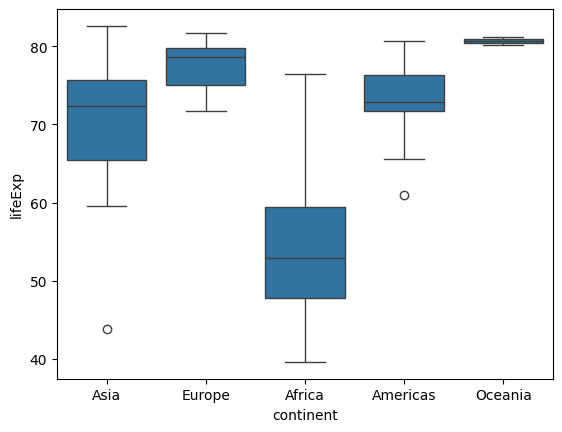

In [21]:
sns.boxplot(gm_2007, x = "continent", y = "lifeExp")

### ✅ Violin Plots
- Like a boxplot but with sideways density plots overlaid on the edges of the boxes.

<Axes: xlabel='continent', ylabel='lifeExp'>

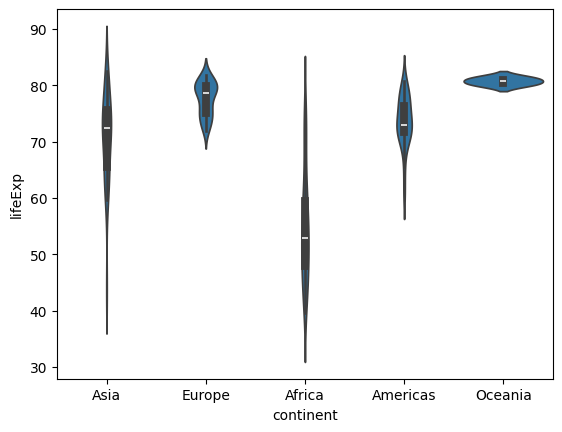

In [22]:
sns.violinplot(gm_2007, x = "continent", y = "lifeExp")

### ✅ Strip Plots
- Just directly showing the points for each category, with some random jitter to avoid overplotting.

<Axes: xlabel='continent', ylabel='lifeExp'>

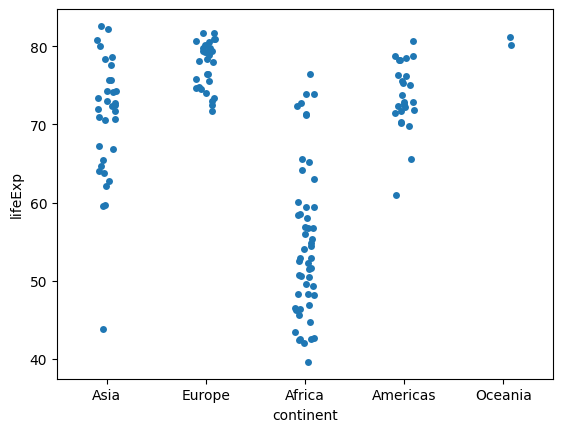

In [23]:
sns.stripplot(gm_2007, x = "continent", y = "lifeExp")

### ✅  Exercise: Creating an Explanatory chart
Key insight: Turkey's population growth outpaces that of the other countries

- Ensure the visualization doesn't distort or misrepresent the data:
- Change y-axis tick labels to more readable format
- Guide your audience to the insight:
  - Make all lines grey except Turkey (and make them a little thicker so they stand out more)
  - Add a title about Turkey's population growth
  - Use subtitle for more explanation
  - Consider whether we really need all of the other country lines
  - Consider adding annotations (maybe about percentage growth?)

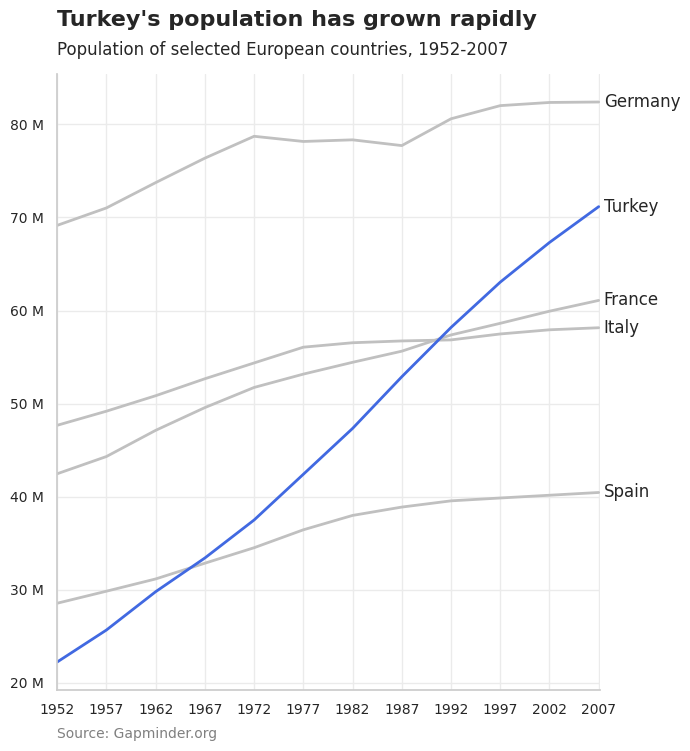

In [24]:
import matplotlib as mpl

# Data
country_names = ["France", "Germany", "Italy", "Spain", "Turkey"]
countries_to_plot = gapminder[gapminder.country.isin(country_names)]

# Custom colors
palette = {country: "royalblue" if country == "Turkey" else "silver" for country in country_names}

# Overall setup and style
sns.set_style("whitegrid", {"grid.color": ".92"})
sns.set_context("notebook")
plt.figure(figsize=(7, 8))

# Draw the chart with Seaborn
sns.lineplot(data=countries_to_plot, x="year", y="pop", hue="country", palette=palette, linewidth=2, legend=False)

# Remove lines at top and right of chart
sns.despine()

# Add titles and footer (positioning them is awkward)
plt.suptitle(
    "Turkey's population has grown rapidly", x=0.125, y=0.96,
    horizontalalignment="left", fontsize=16, fontweight="bold"
)
plt.title("Population of selected European countries, 1952-2007", loc="left", fontsize=12, pad=14)
plt.figtext(0.125, 0.05, "Source: Gapminder.org", color="0.5", fontsize=10)

# Customize x-axis label, tick labels, and limits
plt.xlabel(None)
unique_years = sorted(countries_to_plot["year"].unique())
plt.xticks(unique_years, fontsize=10)
plt.xlim(unique_years[0], unique_years[-1] + 0.1)

# Customize y-axis label and tick labels
plt.ylabel(None)
 # Get current axis so that we can use a formatter on its tick labels
ax = plt.gca()
# Express 80 million as "80 M" not 8 x 1e7
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(unit=""))
plt.yticks(fontsize=10)

# Add country labels at ends of lines
labels = countries_to_plot[countries_to_plot.year == countries_to_plot.year.max()]
for index, row in labels.iterrows():
    plt.annotate(
        row["country"], xy=(row["year"], row["pop"]), xycoords = "data",
        xytext=(5, 0), textcoords = "offset pixels", verticalalignment = "center"
    )